### imports

In [1]:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button, Slider

## The Central Limit Theorem

Let $X_i$ be a Bernoulli Trial

$$ X_i=   \left\{
\begin{array}{ll}
      1 & w.p & P \\
      0 & w.p & 1-P \\
\end{array}
\right.   $$

As seem in class, in a series of $n$ trials will produce $k$ success with a probability that follows a Binomial Distribution:

$f(k,n,p) = Pr(X=k) = $ $n\choose k$  $p^k(1-p)^{n-k}$

We also know that the mean of the binomal distibution is as follows:

$E[f(k,n,p)] = n\cdot p$

### Generate Binomial Distribution

In [2]:
p = 1/3
n = 10
samples = 100000
binomial_rv = stats.binom(n, p)
binomial_rv_samples = binomial_rv.rvs(size=samples)
binomial_rv_samples = np.array(binomial_rv_samples)

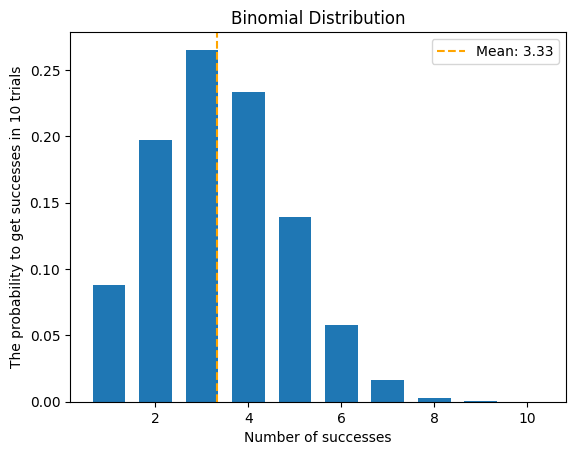

In [3]:
bins = n
mean = binomial_rv.mean()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(binomial_rv_samples, bins=bins, density=True, range=(1,n+1), align='left', rwidth=0.7)
ax.axvline(mean, c='Orange', linestyle='--', label=f'Mean: {mean:.2f}')
ax.set_title('Binomial Distribution')
ax.set_xlabel('Number of successes')
ax.set_ylabel(f'The probability to get successes in {n} trials')
ax.legend()
plt.show()

### Increasing the number of trials - CLT demonstration

The $Central$ $Limit$ $Theorem$ states that when we sample values from a probability distribution and try to estimate the mean, the resulting distribution of the means tends to a normal distribution.

We can think of a bernoulli process as sampling a bernoulli Random Variable n times.
Following the central limit theorem when we increase the number of samples we should tend to a normal distribution with mean $\mu = n \cdot p$ and variance $\sigma^2 = n \cdot p \cdot 1-p$

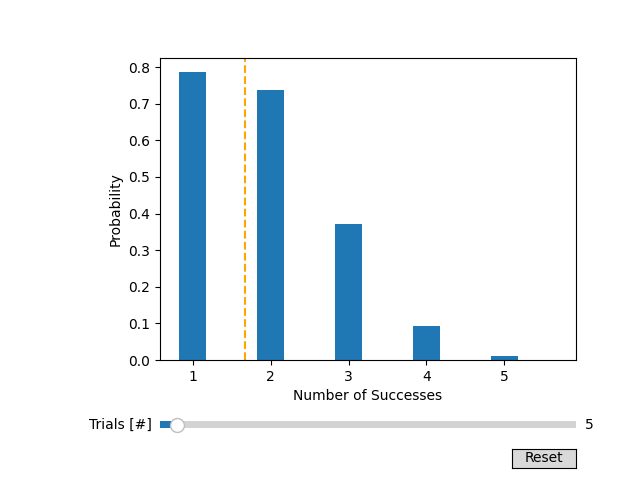

In [4]:
%matplotlib widget

# The parametrized function to be plotted
def generate_binomial_samples(n_trials, p, samples):
    binomial_rv = stats.binom(n_trials, p)
    binomial_rv_samples = binomial_rv.rvs(size=samples)
    binomial_rv_samples = np.array(binomial_rv_samples)
    return binomial_rv_samples

# Define initial parameters
init_n = 5
p = 1/3
init_mean = init_n*p

# Create the figure and the line that we will manipulate
fig = plt.figure()
ax = fig.add_subplot(111)
_, _, line = ax.hist(generate_binomial_samples(init_n, p, 10000), range=(1,init_n+1), density=True, align='left', rwidth=0.7)
ax.axvline(init_mean, c='Orange', linestyle='--', label=f'Mean: {mean:.2f}')
ax.set_xlabel('Number of Successes')    
ax.set_ylabel('Probability')    


# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
ax_n = fig.add_axes([0.25, 0.1, 0.65, 0.03])
n_slider = Slider(
    ax=ax_n,
    label='Trials [#]',
    valmin=1,
    valmax=100,
    valinit=init_n,
)


# The function to be called anytime a slider's value changes
def update(val):
    new_n = int(n_slider.val)
    new_samples = generate_binomial_samples(new_n, p, 10000)
    n_bins = new_n
    ax.cla() 
    ax.hist(new_samples, bins=n_bins, density=True, range=(1,new_n+1), align='left', rwidth=0.7) 
    ax.axvline(new_n*p, c='Orange', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.set_xlabel('Number of Successes') 
    ax.set_ylabel('Probability')    
    fig.canvas.draw_idle()


# register the update function with each slider
n_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    n_slider.reset()
button.on_clicked(reset)

plt.show()